<a href="https://colab.research.google.com/github/amfsunlimited/Machine-Learning-Beginner-/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Machines** are one of the best machine learnign methods when getting the correct answer is a higher priority than understanding why you get the correct answer. They work really well with relatively small datasets and they then to work well out of the box. In other words they donot require much optimization.

**In this lesson you will learn aboout:**

**Importing data from a file**

**Missing data:**

Identifying missing data
dealing with missing data

**Downsampling Data**

**Formatting the data for support vector machines**

Splitting the data into dependent and independent variables
one-hot-encoding 
centering and scaling  the data

Building a preliminary support vector machine
Optimizing parameters and cross validation 

using cross valdation to find the best values for gamma and regulaization

Some topics that might be necessary: Radial Basis Function(RBF) Regulirization, Cross valdation and confusion matrices


In [7]:
import pandas as pd # pandas is used ot load and manipulate data and for one-hot-encoding
import numpy as np #data manipulation 
import matplotlib.pyplot as plt #for drawing graphs
import matplotlib.colors as colors

from sklearn.utils import resample #downsample the dataset
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale #scale and center data
from sklearn.svm import SVC #make a svm for classification 
from sklearn.model_selection import GridSearchCV #for cross validation
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix #draw a confusion matrix

from sklearn.decomposition import PCA #to perform PCA to plot the data


Import the data:

When pandas reads in data, it returns a dataframe which is a lot like spreadsheet. The data are organised in rows and columns and each row can contain a mixture of text and numbers. The standard variable name for a dataframe is df.


In [8]:
df = pd.read_csv("dementia_dataset.csv") #header specifies the row numer of the header. its defaulted to 0. WE can also read the excel file directly from the website


df.head() # gives the 5 rows

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [10]:
df.columns


Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [11]:
df.rename({'Subject ID' : 'ID'}, axis = 'columns', inplace = True) # rename the column name

df.rename({'MRI ID' : 'MRI_ID'}, axis = 'columns', inplace = True)

df.rename({'MR Delay' : 'MR_Delay'}, axis = 'columns', inplace = True)


In [12]:
df.head()

,ID,MRI_ID,Group,Visit,MR_Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [13]:
df.drop('ID', axis = 1, inplace = True) # set axis = 0 to remove rows, axis = 1 to remove cols


In [14]:
df.drop(['Hand'], axis = 1, inplace = True)


In [36]:
df.drop(['MRI_ID'], axis = 1, inplace = True)

In [37]:
df.head()

,Group,Visit,MR_Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


We removed the ID columns as they are not that informative for our predictions.

Next Step is to deal with missing data

Missing Data Part 1: Identify Missing Data

The biggest part of any data analysis project is aking sure the data are correctly formatted and fixing it when it is not. the first part of this process is identifying and dealing with missing data
Missing data is simply a blank space or a surrogate value like NA,that indicates that we failed to collect data for one of the features. 

There are 2 main ways to deal with missing data:

Remove the missing data - 

Impute the missing data - 

Lets first focus on identifying the type of data in each column


In [38]:
df.dtypes

Group        object
Visit         int64
MR_Delay      int64
M/F          object
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [39]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR_Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587



We should make sure that each columns contains acceptable values. 

Lets start by making sure that the categorical columns contain only category values

In [40]:
df['M/F'].unique()

array(['M', 'F'], dtype=object)

This column looks fine as it contains only 2 category values>

Lets check for other columns.

In [41]:
df["EDUC"].unique()

array([14, 12, 18, 16,  8, 20, 13,  6, 17, 15, 23, 11])

In [42]:
df["SES"].unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

The ses column contains nan values which are not informative and we might need to remove them or impute them with new values basd on their frequency

In [43]:
len(df.loc[(df['SES'] == 'nan')])

0

In [44]:
df.isnull().sum()

Group        0
Visit        0
MR_Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

We can see that there are 21 na values in total in SES and MMSE columns.
 
 Firstly lets, try by removing the rows with nan values.
 

In [120]:
df_no_missing = df[df['SES'].notna()]
df_no_missing = df_no_missing[df_no_missing['MMSE'].notna()]
df_no_missing

,Group,Visit,MR_Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,1,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,1,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [134]:
# df_no_missing.Group.replace('Nondemented', 2)
# df_no_missing.Group.replace('Demented', 1)
# df_no_missing.Group.replace('Converted', 0)

# df_no_missing.apply(pd.Series.replace, to_replace="Nondemented", value=2)



In [132]:
df_no_missing = df_no_missing.apply(pd.Series.replace, to_replace=["Demented",'Nondemented','Converted'], value=[1,2,0])



In [142]:
df_no_missing['Group'].unique()

array([2, 1, 0])

In [136]:
df_no_missing.isnull().sum()

Group       0
Visit       0
MR_Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

Downsample the data:

SVMs are great with small datasets but not that great with large datasets. If the dataset is huge, it will take a ling time to optimize with cross validation.

In our case the dataset is a small one, hence we dont need to downsample it. 

df_no_dementia = df_no_missing['Group'] == "Nondementia"
df_dementia = df_no_missing['Group'] == "Dementia"

df_no_dementia_down = resample(df_no_dementia, replace = False, n_samples = 150, random_state = 42)

df_dementia_down = resample(df_dementia, replace = False, n_samples = 150, random_state = 42)

Format Data: Split data into dependent and independent variables



Now that we have taken care of missing data,, we are ready to start formatting dat for making a svm
First step is to split the data into teo parts 

the columns of data that we will be using to make classifications
the column of data that we want to predict

The reason we deal with missing data before splitting it into x and y is that if we remove rows, splitting after ensures each row in x corresponds to value in you

use copy method to copy the data by value. By default pandas uses copy by reference. using copy() ensures that the original data is not modified when we modify x anfd y.


In [137]:
X = df_no_missing.drop('Group', axis = 1).copy() #alternatively X = df_no_missing.iloc[:,:1].copy()

y = df_no_missing['Group'].copy()



In [48]:
X.head()

,Visit,MR_Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,1,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,1,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [141]:
y.head()

0    2
1    2
5    2
6    2
7    2
Name: Group, dtype: int64

Format the data Part 2: One - Hot encoding

Some columns in our dataset contains categorical data like Gropu and M/F

sklearn SVM do not natively support categorical data like sex, group. Thus in order to use categorical data, we have to use a trick that converts acolumn of categorical data into multiple columns of binary values. This is calles one hot encoding

Note that there are many different ways to do one hot encoding in Python. Two of the more popular methods are ColumnTransformer() from sklearn and get_dummies() from pandas.

ColumnTransformer() creates a persistent function that can validate data you get in the future. The downside is that it turns the data into an array and loses all the column names, making it harder to verify that it worked. get_dummies leaves the data as it is but is not persistent for future data.


In [143]:
pd.get_dummies(X, columns = ['M/F']).head()

,Visit,MR_Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,1
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,0,1
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,1,0
6,2,538,90,18,3.0,27.0,0.0,1200,0.718,1.462,1,0
7,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039,0,1


In [144]:
X.head()

,Visit,MR_Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,1,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,1,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [145]:
X_encode = pd.get_dummies(X, columns = ['M/F'])

In [146]:
y_encode = pd.get_dummies(y, columns = ['Group'])

In [147]:
X_encode.head()

,Visit,MR_Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,1
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,0,1
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,1,0
6,2,538,90,18,3.0,27.0,0.0,1200,0.718,1.462,1,0
7,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039,0,1


In [148]:
y_encode.head()

,0,1,2
0,0,0,1
1,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1


Format the data Part 3: centering and scaling

The radial basis function that we are using assumes that the data are centered and scaled. In other words, each column should have a mean value = 0 and standard deviation = 1


In [149]:
X_train, X_test, y_train , y_test = train_test_split(X_encode, y, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [150]:
y_train


277    2
66     2
119    2
343    1
115    0
      ..
77     1
112    2
282    2
367    1
108    2
Name: Group, Length: 265, dtype: int64


Building a preliminary Support Vector Machines


In [151]:

svm_classifier = SVC(random_state = 42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [152]:
y_pred = svm_classifier.predict(X_test_scaled)

In [153]:
y_pred

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2])

Confusion Matrix is used to see how accurate the predictions were. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


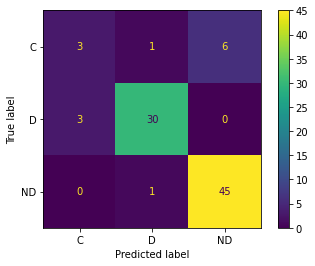

In [154]:
plot_confusion_matrix(svm_classifier, X_test_scaled,y_test, values_format = 'd', display_labels = ['C', 'D', 'ND'])


Optimize Parameters with Cross Valisation and GridSearchCV()

Optimizing a Support Vector Machine is all about finding the best value for gamma and potentially the rgularization parameter C. So lets see if we can better parameters using cross validarion in hope that we can improv the accuracy with the tesing data.

Since we have two paramters to optimize we will use the GridSearchCv(). We specify a bunch of potential values for gamma and c adn GridSearchCv tests all the possible combinations for us.


In [155]:
param_grid = [{'C':[0.5, 1, 10, 100], 'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']},]

#we are using C = 1 and gamma = scale since hose are the default values.


In [156]:
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy')



In [157]:

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [160]:

#NOw that we have the ideal values for C anf gamma we can build the final svm

svm_classifier = SVC(random_state = 42, C = 100, gamma = 0.001)
svm_classifier.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


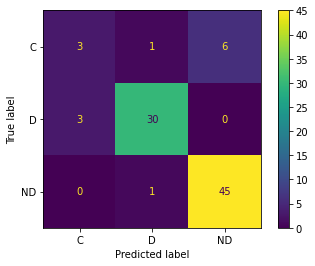

In [161]:
plot_confusion_matrix(svm_classifier, X_test_scaled,y_test, values_format = 'd', display_labels = ['C', 'D', 'ND'])

In [162]:
len(X.columns)

11

We have 11 columns/feature in our dataset. This is a problem because it would require 11 dimensional graph to make predictions. We will use Proncipal component analysis to combine those 11 features into 2 orthoganal meta-featrues that we can use as axes for the graph.

But to shrink the graph into 2d the graph should be accurate. We can determine the accuracy of the graph by drawing something called a scree plot.

In [163]:
pca = PCA() # by default PCA() ceners data but doesnot scale it.
X_train_pca = pca.fit_transform(X_train_scaled)


In [164]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var)+1)]


In [165]:
per_var

array([29.4, 17.7, 17.2, 12.6,  9.1,  6.1,  2.9,  2.3,  2.2,  0.5,  0.1,
        0. ])

In [83]:
labels

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

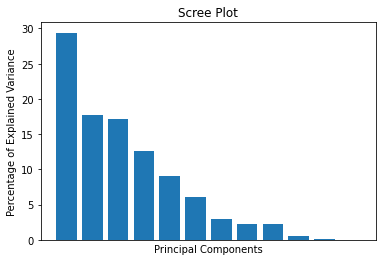

In [166]:
plt.bar(x = range(1,len(per_var)+1), height = per_var)
plt.tick_params( axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

The scree plot shows that the first principal component PC1, accounts for large amount of variation in the raw data, and this means that it will be a doog candidate for the x-axis in the 2 dimensional graph. However PC2 is not much different from PC3 and PC4 whicch does not bode well for the dimension reduction.

#Plotting the graph: 

In [167]:


train_pc1_records = X_train_pca[:, 0]
train_pc2_records = X_train_pca[:, 1]


pc1 contains the x-axis data after pca and pc2 contains y-axis data
#Now we center and scale

In [168]:
pca_train_scaled = scale(np.column_stack((train_pc1_records, train_pc2_records)))



#now we optimixe the svm fit to the x and y coordinates of the ddata fater pca dimension reduction


In [169]:
param_grid = [{'C': [1,10,100,1000], 'gamma': ['scale', 1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}]

optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', verbose = 0)

optimal_params.fit(pca_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [170]:
print(optimal_params.best_params_)


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [171]:
svm_classifier = SVC(random_state = 42, gamma = 0.1, C = 10)
svm_classifier.fit(pca_train_scaled, y_train)


SVC(C=10, gamma=0.1, random_state=42)

In [172]:
X_test_pca = pca.transform(X_train_scaled)

test_pc1_records = X_test_pca[:,0]
test_pc2_records = X_test_pca[:,1]


Now create a matrix of points that we can use to show the decision regions. the matrix will be a little bit larger than the transformed PCA points so that we can plot all of the PCA points on it without them being on the edge.


In [173]:
x_min = test_pc1_records.min() - 1
x_max = test_pc1_records.max() + 1

y_min = test_pc2_records.min() - 1
y_max = test_pc2_records.max() + 1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step = 0.1),np.arange(start = y_min, stop = y_max, step = 0.1))


In [109]:
yy


array([[-3.57962201, -3.57962201, -3.57962201, ..., -3.57962201,
        -3.57962201, -3.57962201],
       [-3.47962201, -3.47962201, -3.47962201, ..., -3.47962201,
        -3.47962201, -3.47962201],
       [-3.37962201, -3.37962201, -3.37962201, ..., -3.37962201,
        -3.37962201, -3.37962201],
       ...,
       [ 5.42037799,  5.42037799,  5.42037799, ...,  5.42037799,
         5.42037799,  5.42037799],
       [ 5.52037799,  5.52037799,  5.52037799, ...,  5.52037799,
         5.52037799,  5.52037799],
       [ 5.62037799,  5.62037799,  5.62037799, ...,  5.62037799,
         5.62037799,  5.62037799]])


Now we will classify every point on that matrix with the svm. Point on one side of the classification boundary will get 0, and points on the other side will get 1.


In [174]:

Z = svm_classifier.predict(np.column_stack((xx.ravel(), yy.ravel())))


In [175]:
Z


array([2, 2, 2, ..., 2, 2, 2])


Right now Z is just a long array of lots of 0s and 1s, which reflect how each point in the mesh was classifeid. We use reshape() so that each classification corresponds to a specific point in the matrix. 


In [176]:

Z = Z.reshape(xx.shape)


In [177]:
Z

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

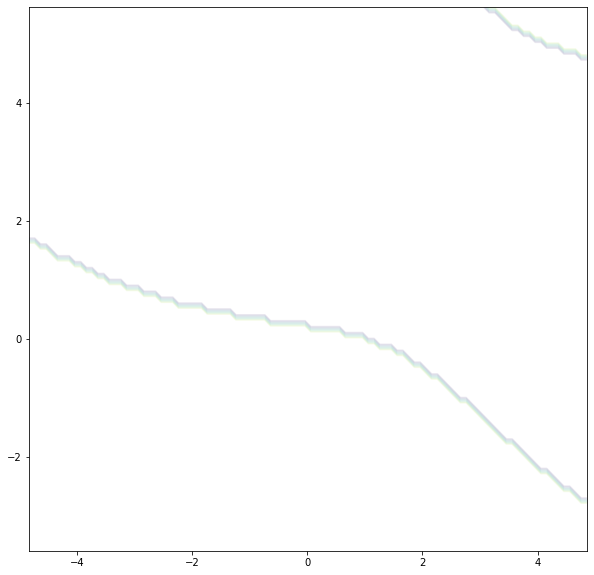

In [178]:

fig, ax = plt.subplots(figsize = (10,10))


# Now we will use contourf() to draw a filled contour plot useing the matrix values and classification. The contours will be filled according to the predicted classification  in Z.

ax.contour(xx,yy,Z,alpha = 0.1)

# Now create custom colours for the actual data points 

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])


now draw the actual data points - these will be colored by their known classifications 
Note - setting alpha = 0.7 we can see if we are covering up a point 


In [180]:
scatter = ax.scatter(test_pc1_records, test_pc2_records, c = y_train, cmap = cmap, s = 100, edgecolors = 'k', alpha = 0.7)

legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc = 'upper right')

legend.get_texts()[0].set_text("ND")
legend.get_texts()[1].set_text("D")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')

ax.set_title("Decision Surface using the pCA transformed features")

plt.show()